<a href="https://colab.research.google.com/github/kailashDataScience/newproject/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
from sklearn.linear_model import LinearRegression
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use('seaborn-darkgrid')
import yfinance as yf

<ipython-input-5-b0dcc9f5d888>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


[*********************100%***********************]  1 of 1 completed


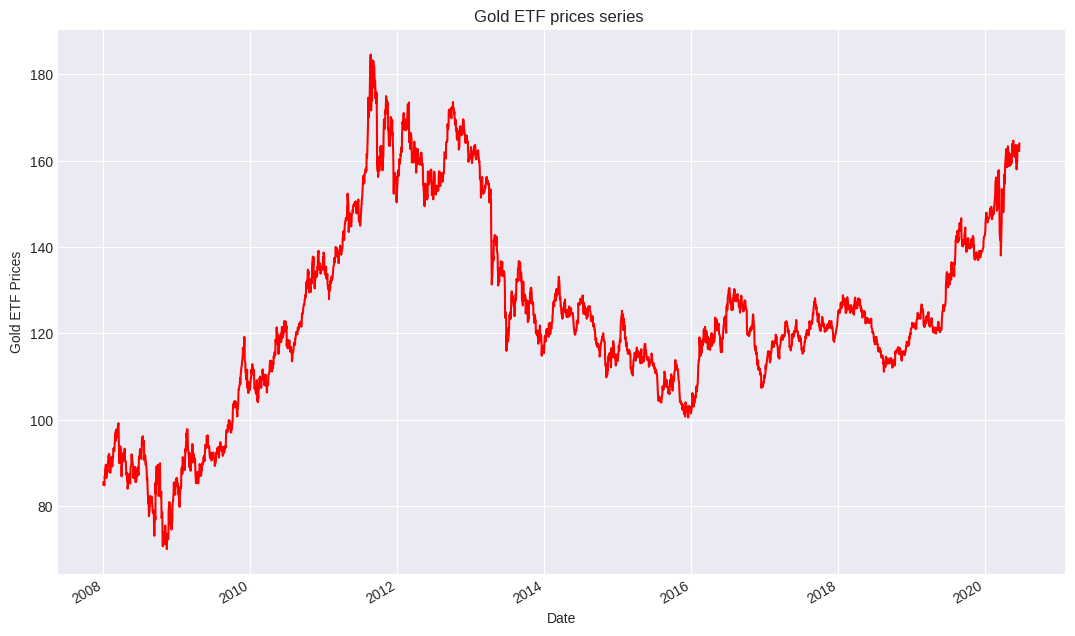

In [ ]:
df = yf.download('GLD', '2008-01-01', '2020-6-22', auto_adjust=True)
df = df[['Close']]
df = df.dropna()
df.Close.plot(figsize=(13,8),color = 'r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF prices series ")
plt.show()

In [ ]:
#define explanatory variables 

df['s_3'] = df['Close'].rolling(window = 3).mean()
df['s_9'] = df['Close'].rolling(window = 3).mean()
df['next_day_price'] = df['Close'].shift(-1)
df = df.dropna()
x = df[['s_3','s_9']]

y = df['next_day_price']

In [ ]:
t = .8
t = int(t*len(df))

x_train =  x[:t]
y_train =  y[:t]

x_test =  x[t:]
y_test =  y[t:]


In [15]:
linear = LinearRegression().fit(x_train,y_train)
print("Linear regression model ")
print("Gold ETF Price (y) = % .2f * 3 days moving averrage (x1)  \
+  %.2f * 9 Days Moving Average (x2) \
+  %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear regression model 
Gold ETF Price (y) =  503878550818.02 * 3 days moving averrage (x1)  +  -503878550817.02 * 9 Days Moving Average (x2) +  0.43 (constant)


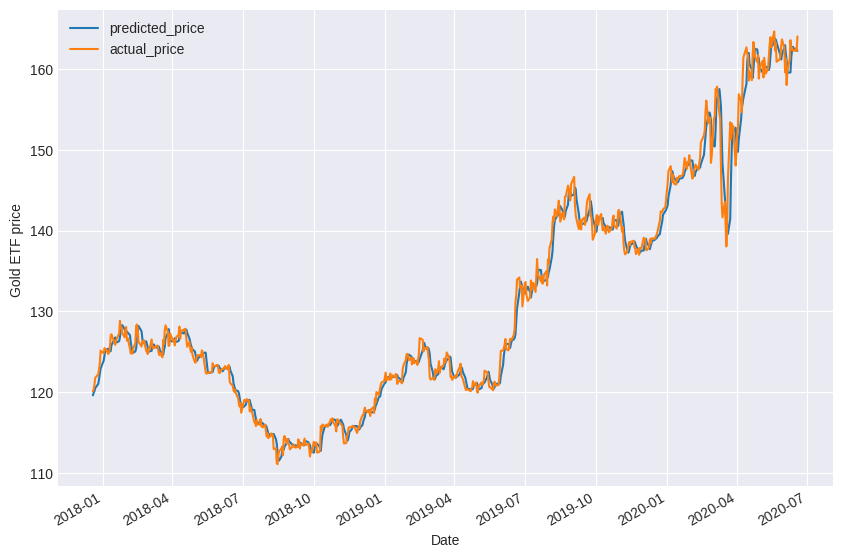

In [21]:
predicted_price = linear.predict(x_test)
predicted_price = pd.DataFrame(predicted_price, index = y_test.index, columns = ['price'])
predicted_price.plot(figsize=(10,7))
#plt.figure(figsize=(10,7))
y_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel("Gold ETF price ")
plt.show()